loading and exploring the dataset  [supply_chain_data dataset](https://1drv.ms/x/c/060d2f6ab0166614/ERPdM818HKlFvI-fgtTQKK8BRoy0b-lDHflGeCihmmLhtA?e=ZqXwnl)

In [ ]:
import pandas as pd

# Load the dataset to inspect its contents
file_path = '/content/supply_chain_data.csv'
supply_chain_data = pd.read_csv(file_path)

# Display basic information and the first few rows to understand the structure of the dataset
supply_chain_data.info(), supply_chain_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

(None,
   Product type   SKU      Price  Availability  Number of products sold  \
 0     haircare  SKU0  69.808006            55                      802   
 1     skincare  SKU1  14.843523            95                      736   
 2     haircare  SKU2  11.319683            34                        8   
 3     skincare  SKU3  61.163343            68                       83   
 4     skincare  SKU4   4.805496            26                      871   
 
    Revenue generated Customer demographics  Stock levels  Lead times  \
 0        8661.996792            Non-binary            58           7   
 1        7460.900065                Female            53          30   
 2        9577.749626               Unknown             1          10   
 3        7766.836426            Non-binary            23          13   
 4        2686.505152            Non-binary             5           3   
 
    Order quantities  ...  Location Lead time  Production volumes  \
 0                96  ...    Mum

Data Cleaning

In [ ]:
print(supply_chain_data.isnull().sum())

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


calculated key metrics

In [ ]:
# Calculate Inventory Turnover, Supplier Performance (lead time and defect rate), and other key metrics
supply_chain_data['Inventory Turnover'] = supply_chain_data['Number of products sold'] / supply_chain_data['Stock levels']
supply_chain_data['Supplier Performance'] = (1 / supply_chain_data['Lead time']) * (1 / supply_chain_data['Defect rates'])

# Calculate cost to revenue ratio for better cost analysis
supply_chain_data['Cost to Revenue Ratio'] = supply_chain_data['Costs'] / supply_chain_data['Revenue generated']

# Display the dataset with newly calculated columns
supply_chain_data[['Product type', 'SKU', 'Inventory Turnover', 'Supplier Performance', 'Cost to Revenue Ratio']].head()


,Product type,SKU,Inventory Turnover,Supplier Performance,Cost to Revenue Ratio
0,haircare,SKU0,13.827586,0.152302,0.021675
1,skincare,SKU1,13.886792,0.008957,0.067427
2,haircare,SKU2,8.000000,0.018193,0.014818
3,skincare,SKU3,3.608696,0.008778,0.032803
4,skincare,SKU4,174.200000,0.063581,0.343733


Supplier Performance and Cost Efficiency

In [ ]:


# Supplier Performance - Top and Bottom suppliers based on performance
top_suppliers = supply_chain_data[['Supplier name', 'Location', 'Supplier Performance']].sort_values(by='Supplier Performance', ascending=False).head(5)
bottom_suppliers = supply_chain_data[['Supplier name', 'Location', 'Supplier Performance']].sort_values(by='Supplier Performance').head(5)

# Cost Efficiency - Top products and locations based on Cost to Revenue Ratio
high_cost_products = supply_chain_data[['Product type', 'SKU', 'Location', 'Cost to Revenue Ratio']].sort_values(by='Cost to Revenue Ratio', ascending=False).head(5)
low_cost_products = supply_chain_data[['Product type', 'SKU', 'Location', 'Cost to Revenue Ratio']].sort_values(by='Cost to Revenue Ratio').head(5)

# Displaying the results for both analyses
top_suppliers, bottom_suppliers, high_cost_products, low_cost_products


(   Supplier name Location  Supplier Performance
 21    Supplier 5  Chennai              2.828504
 43    Supplier 5   Mumbai              2.685972
 74    Supplier 4    Delhi              2.521351
 11    Supplier 2  Kolkata              1.687038
 17    Supplier 1  Chennai              1.400275,
    Supplier name   Location  Supplier Performance
 42    Supplier 5  Bangalore              0.007787
 55    Supplier 2      Delhi              0.008142
 20    Supplier 1    Chennai              0.008149
 84    Supplier 5    Chennai              0.008603
 3     Supplier 5    Kolkata              0.008778,
    Product type    SKU   Location  Cost to Revenue Ratio
 91    cosmetics  SKU91      Delhi               0.515076
 75     skincare  SKU75    Chennai               0.462200
 10     skincare  SKU10    Kolkata               0.345824
 42     skincare  SKU42  Bangalore               0.345539
 4      skincare   SKU4      Delhi               0.343733,
    Product type    SKU Location  Cost to Revenue

Inventory Turnover Optimization and Lead Time and Shipping Analysis

In [ ]:
# Inventory Turnover Optimization - Highest and Lowest Turnover products
high_turnover_products = supply_chain_data[['Product type', 'SKU', 'Inventory Turnover']].sort_values(by='Inventory Turnover', ascending=False).head(5)
low_turnover_products = supply_chain_data[['Product type', 'SKU', 'Inventory Turnover']].sort_values(by='Inventory Turnover').head(5)

# Lead Time and Shipping - Correlation between Lead Time and Shipping Cost
lead_time_shipping_corr = supply_chain_data[['Lead time', 'Shipping costs']].corr().iloc[0, 1]  # Correlation coefficient between lead time and shipping costs

# Displaying the results for both analyses
high_turnover_products, low_turnover_products, lead_time_shipping_corr


(   Product type    SKU  Inventory Turnover
 68     haircare  SKU68                 inf
 34     skincare  SKU34               602.0
 47     skincare  SKU47               227.5
 78     haircare  SKU78               189.2
 4      skincare   SKU4               174.2,
    Product type    SKU  Inventory Turnover
 45     haircare  SKU45            0.258065
 48     haircare  SKU48            0.966667
 49    cosmetics  SKU49            1.020619
 97     haircare  SKU97            1.347826
 89    cosmetics  SKU89            1.488889,
 0.029679505782671638)

Predictive Analytics (Demand Forecasting)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Select relevant features and target
X = supply_chain_data[['Price', 'Stock levels', 'Lead time', 'Availability']]
y = supply_chain_data['Number of products sold']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, R-squared: {r2}")


MAE: 309.33299999999997, R-squared: -0.4331627161684064


Optimization (Inventory Levels Optimization)

In [ ]:
import numpy as np

# Define the parameters
annual_demand = supply_chain_data['Number of products sold'].sum()
ordering_cost = 100  # Example value, adjust as needed
holding_cost = 10    # Example value, adjust as needed

# Calculate EOQ
EOQ = np.sqrt((2 * annual_demand * ordering_cost) / holding_cost)
print(f"Optimal EOQ: {EOQ}")


Optimal EOQ: 960.1978962693055


Segmentation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


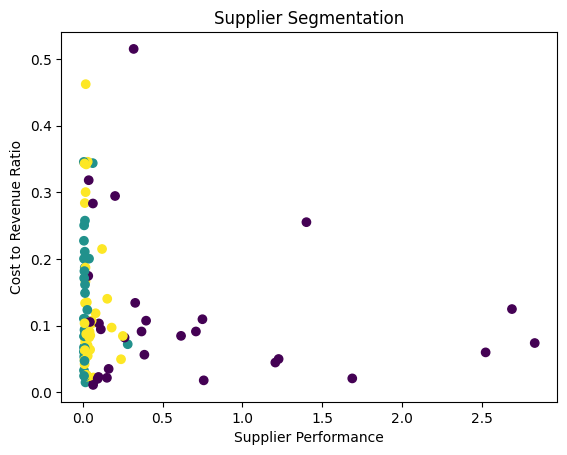

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant features for segmentation
X = supply_chain_data[['Supplier Performance', 'Cost to Revenue Ratio', 'Defect rates']]

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
supply_chain_data['Segment'] = kmeans.fit_predict(X)

# Plot the segmentation
plt.scatter(X['Supplier Performance'], X['Cost to Revenue Ratio'], c=supply_chain_data['Segment'])
plt.xlabel('Supplier Performance')
plt.ylabel('Cost to Revenue Ratio')
plt.title('Supplier Segmentation')
plt.show()
